# Ppromptcap-coco-vqa
Reference link [here](https://huggingface.co/vqascore/promptcap-coco-vqa)

In [18]:
import torch
print(torch.cuda.is_available())
print(torch.cuda.get_device_name(0))
import cv2
import matplotlib.pyplot as plt
import numpy as np
import json
import random
import pprint

True
NVIDIA GeForce RTX 3090


## Data loading
Import json file. 

In [19]:
direc = '/media/arnau/PEN/TFG/train/'

with open('./data/imgs_w_txt_ocr.json') as user_file:
  imgs_w_txt = json.load(user_file)

Key-value pair example from json file

In [20]:
k = "VizWiz_train_00014833.jpg"
v = imgs_w_txt[q]

print(f"Key: {k}\n")
print("Value:\n")
pprint.pprint(v)


Key: VizWiz_train_00014833.jpg

Value:

{'answerable': 1.0,
 'flaws': [True, True, True, False, False, False, False, True],
 'ocr': ['au A4ja4l', '0fu4 ) oudannk', 'Aaa', 'TateR'],
 'question': 'What is in this bottle?',
 'recognizable': 1.0}


## Model loading
Load VQA model


In [21]:
from promptcap import PromptCap_VQA

# QA model support all UnifiedQA variants. e.g. "allenai/unifiedqa-v2-t5-large-1251000"
vqa_model = PromptCap_VQA(promptcap_model="vqascore/promptcap-coco-vqa", 
                          qa_model="allenai/unifiedqa-t5-base")

if torch.cuda.is_available():
  vqa_model.cuda()

vqascore/promptcap-coco-vqa
<super: <class 'OFATokenizer'>, <OFATokenizer object>>


/home/arnau/tfg/GED-TFG/env/lib/python3.10/site-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3190.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


## Helpers

Auxiliary function for plotting images

In [22]:
def plot_img(full_img_path):
  """
  Given an image path, this functions plots the image.
  """

  plt.figure(figsize=(3,3))
  img = cv2.imread(full_img_path)
  imgc = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  plt.imshow(imgc)
  plt.axis('off')
  plt.show()

## Inference
Inference test with some image samples

In [26]:
# Take 3 random images
test_samples = random.sample(list(imgs_w_txt.keys()), 3)

### VQA

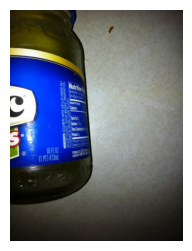

Q: What is this?
A: a bottle of water on a table


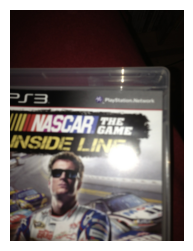

Q: What video game is it, and how much do you think it's worth?
A: nascar


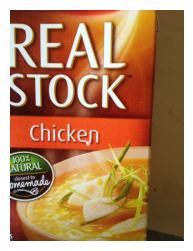

Q: Can you tell me what this is, please?
A: a box of real stock chicken.


In [27]:
for image in test_samples:
  question = imgs_w_txt[image]['question']

  plot_img(direc + image)

  print(f"Q: {question}")
  print(f"A: {vqa_model.vqa(question, direc + image)}")

### VQA + OCR inputs

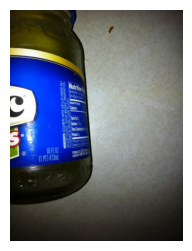

Q: What is this?
A: a bottle of water on a table


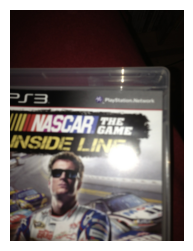

Q: What video game is it, and how much do you think it's worth?
A: nascar the game


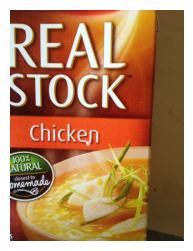

Q: Can you tell me what this is, please?
A: a box of real stock chicken


In [28]:
for image in test_samples:
  question = imgs_w_txt[image]['question']
  choices = imgs_w_txt[image]['ocr']

  plot_img(direc + image)

  print(f"Q: {question}")
  print(f"A: {vqa_model.vqa_multiple_choice(question, direc + image, choices)}")

More models found here: https://github.com/allenai/unifiedqa